# Import libraries

In [49]:
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from plotly.offline import iplot
from plotly.subplots import make_subplots
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
pio.renderers.default = "notebook_connected"
cf.go_offline()

NameError: name 'cf' is not defined

# The Simplest Possible Model

A truly simple mathematical model can be described by the following differential equation:

$$
\frac{dM}{dt} = k
$$

which says that the variable $M$ increases at a rate $k$ per time unit. For example, $M$ can represent the amount of money in your
bank account, and that $k$ is the amount of Euros that are deposited in this account on a daily basis.

The solution for this equation is

$$
M(t) = M(0) + kt
$$

where $M(0)$ is the initial value.

In [44]:
k = 1 
t = np.linspace(0, 10, 100) 

initial_conditions = [10, 20, 30, 40] 

fig = go.Figure()

for M0 in initial_conditions:
    M = M0 + k * t 
    fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name=f'M(0)={M0}'))

fig.update_layout(
    title='Solution of dM/dt = k for Different Initial Conditions',
    xaxis_title='Time (t)',
    yaxis_title='M(t)',
    legend_title="Initial M(0)",
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2), 
    yaxis=dict(showgrid=False, linecolor='black', linewidth=2),  
    plot_bgcolor='white',  
    width=700,  
    height=700,
    legend=dict(
        x=1,  
        y=0,  
        xanchor='right',  
        yanchor='bottom'  
    )
)

fig.show(renderer="svg")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


One can define a little bit more complex model by introducing the assumption that your spending is proportional to the amount of money you have.

$$
\frac{dM}{dt} = k - dM
$$

The solution to the differential equation is given by:

$$
M(t) = \frac{k}{d} \left(1 - e^{-dt}\right) + M(0)e^{-dt}
$$

For $t \to \infty$, one gets the steady state.

$$
M^* = \frac{k}{d}
$$

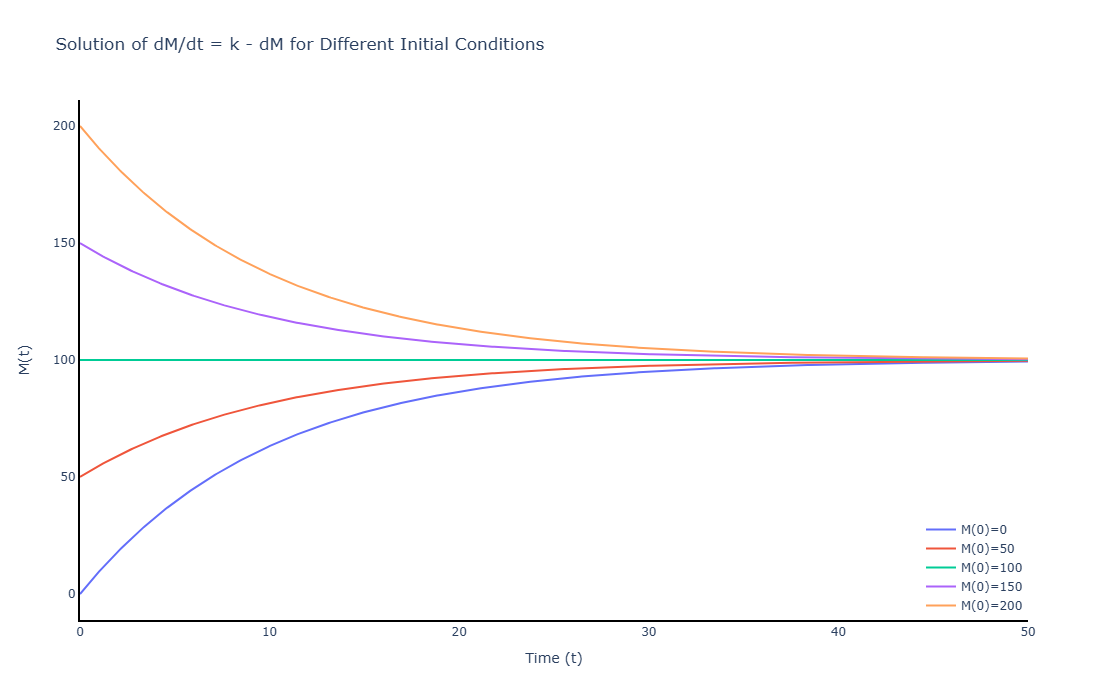

In [28]:
k = 10  
d = 0.1  
t = np.linspace(0, 50, 500)  

initial_conditions = [0, 50, 100, 150, 200] 

fig = go.Figure()

for M0 in initial_conditions:
    M = (k / d) * (1 - np.exp(-d * t)) + M0 * np.exp(-d * t) 
    fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name=f'M(0)={M0}'))


fig.update_layout(
    title='Solution of dM/dt = k - dM for Different Initial Conditions',
    xaxis_title='Time (t)',
    yaxis_title='M(t)',
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2), 
    yaxis=dict(showgrid=False, linecolor='black', linewidth=2),  
    plot_bgcolor='white',  
    width=700,  
    height=700,
    legend=dict(
        x=1,  
        y=0,  
        xanchor='right',  
        yanchor='bottom'  
    )
)

iplot(fig)

For $k = 0$ we get the exponential decay equation

$$
\frac{dM}{dt} = - dM
$$

The solution to the differential equation is given by:

$$
M(t) = M(0)e^{-dt}
$$

Applying the natural logarithm to both sides we obtain:

$$
\ln(M(t)) = \ln(M(0)e^{-dt})
$$

$$
\ln(M(t)) = \ln(M(0)) + \ln(e^{-dt})
$$

$$
\ln(M(t)) = \ln(M(0)) - dt
$$

Thus, the logarithmic form of the equation is:

$$
\ln(M(t)) = \ln(M(0)) - dt
$$

### Semilogy scale

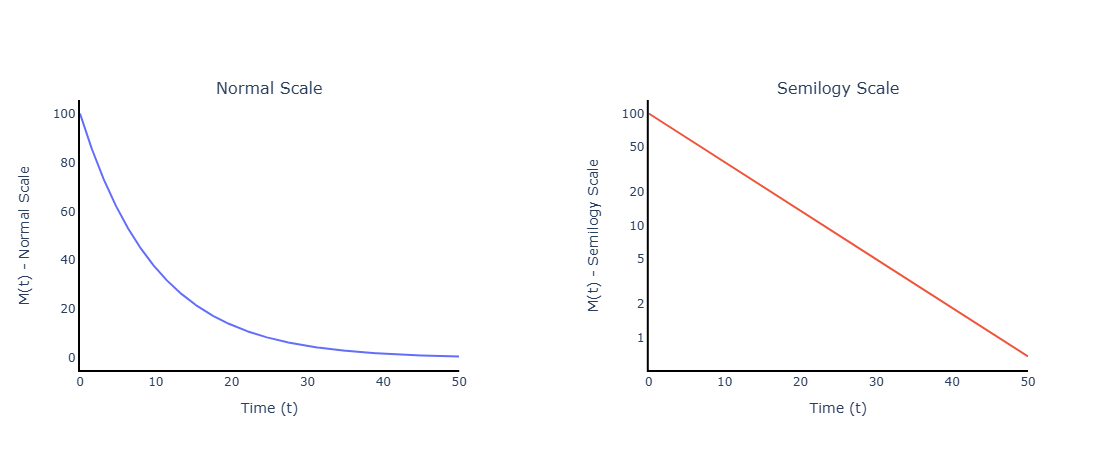

In [29]:
M0 = 100
d = 0.1  
t = np.linspace(0, 50, 500)  

M = M0 * np.exp(-d * t)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Normal Scale", "Semilogy Scale"),
                   horizontal_spacing = 0.2)

fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name='Normal Scale'), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name='Semilogy Scale'), row=1, col=2)

fig.update_layout(
    xaxis_title='Time (t)',
    xaxis2_title='Time (t)',
    yaxis=dict(title='M(t) - Normal Scale', type='linear', showgrid=False,
               linecolor='black', linewidth=2),
    yaxis2=dict(title='M(t) - Semilogy Scale', type='log', showgrid=False,
                linecolor='black', linewidth=2, tickformat=',.0f'),
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2),
    xaxis2=dict(showgrid=False, linecolor='black', linewidth=2),
    height=450,
    width=900,
    plot_bgcolor='white',  
    showlegend=False
)

iplot(fig)

### Plot of different initial conditions and the same d

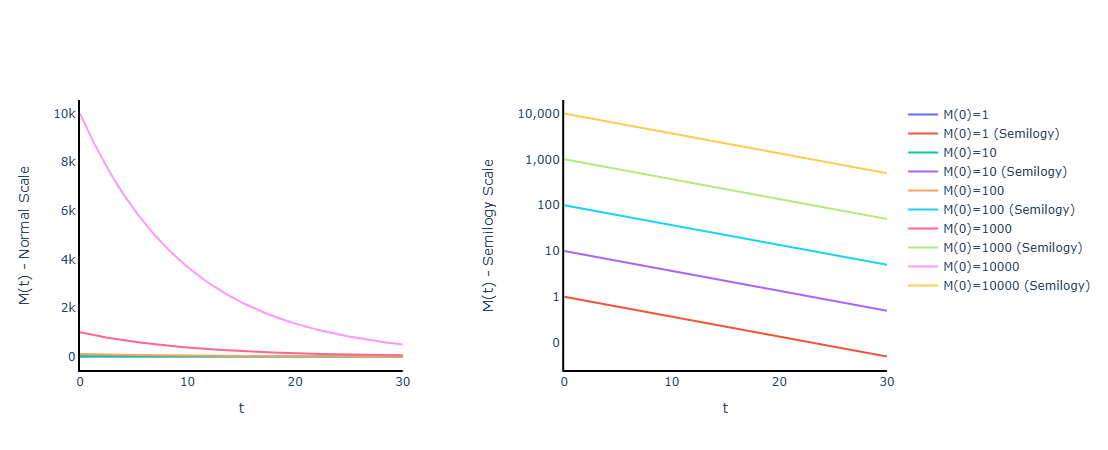

In [5]:
d = 0.1
t = np.linspace(0, 30, 500) 
initial_conditions = [1, 10, 100, 1000, 10000] 

fig = make_subplots(rows=1, cols=2, horizontal_spacing = 0.2)

for M0 in initial_conditions:
    M = M0 * np.exp(-d * t)
    fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name=f'M(0)={M0}'), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name=f'M(0)={M0} (Semilogy)'), row=1, col=2)

fig.update_yaxes(title_text="M(t) - Normal Scale", type='linear', row=1, col=1)
fig.update_yaxes(title_text="M(t) - Semilogy Scale", type='log', tickformat=',.0f', row=1, col=2)

fig.update_layout(height=450,width=900, plot_bgcolor='white', showlegend=True,
                  xaxis=dict(title_text='t', showgrid=False, linecolor='black', linewidth=2),
                  xaxis2=dict(title_text='t', showgrid=False, linecolor='black', linewidth=2),
                  yaxis=dict(showgrid=False, linecolor='black', linewidth=2),
                  yaxis2=dict(showgrid=False, linecolor='black', linewidth=2),)

fig.show()

### Plot of the same initial condition and different d values

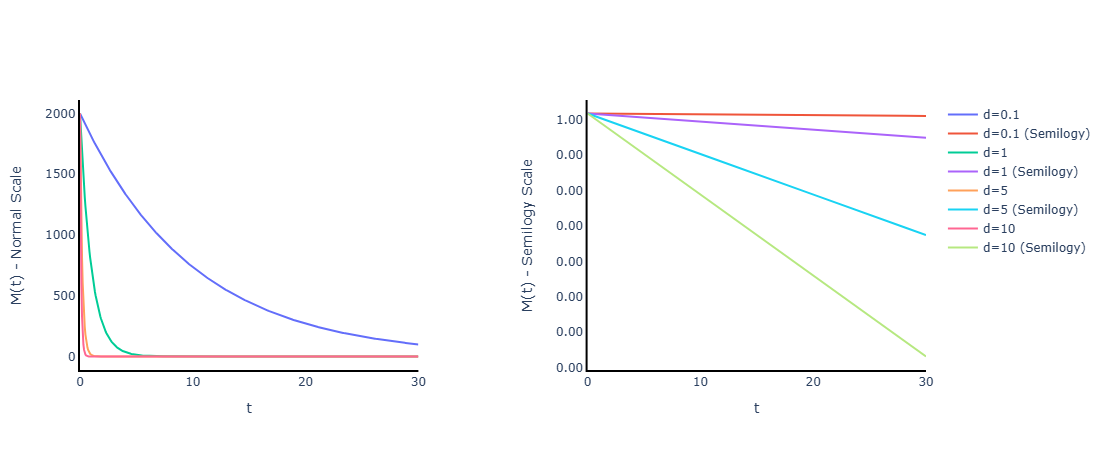

In [30]:
d_vals = [0.1, 1, 5, 10]
t = np.linspace(0, 30, 500) 
M0 = 2000 

fig = make_subplots(rows=1, cols=2, horizontal_spacing = 0.2)

for d in d_vals:
    M = M0 * np.exp(-d * t)
    fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name=f'd={d}'), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=M, mode='lines', name=f'd={d} (Semilogy)'), row=1, col=2)

fig.update_yaxes(title_text="M(t) - Normal Scale", type='linear', row=1, col=1)
fig.update_yaxes(title_text="M(t) - Semilogy Scale", type='log', tickformat=',.2f', row=1, col=2)

fig.update_layout(height=450,width=900, plot_bgcolor='white', showlegend=True,
                  xaxis=dict(title_text='t', showgrid=False, linecolor='black', linewidth=2),
                  xaxis2=dict(title_text='t', showgrid=False, linecolor='black', linewidth=2),
                  yaxis=dict(showgrid=False, linecolor='black', linewidth=2),
                  yaxis2=dict(showgrid=False, linecolor='black', linewidth=2))

iplot(fig)

# Logistic equation - modeling population growth

Letting $N$ represent population size and $t$ represent time, this model is formalized by the differential equation:

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right),
$$

where the constant $r$ defines the growth rate and $K$ is the carrying capacity.

## Analytical solution

The solution describes how the population $N$ evolves over time towards the carrying capacity $K$. The general solution is given by:

$$
N(t) = \frac{K}{1 + \left(\frac{K - N_0}{N_0}\right) e^{-rt}}
$$

where:
- $N_0$ is the initial population size at time $t = 0$.

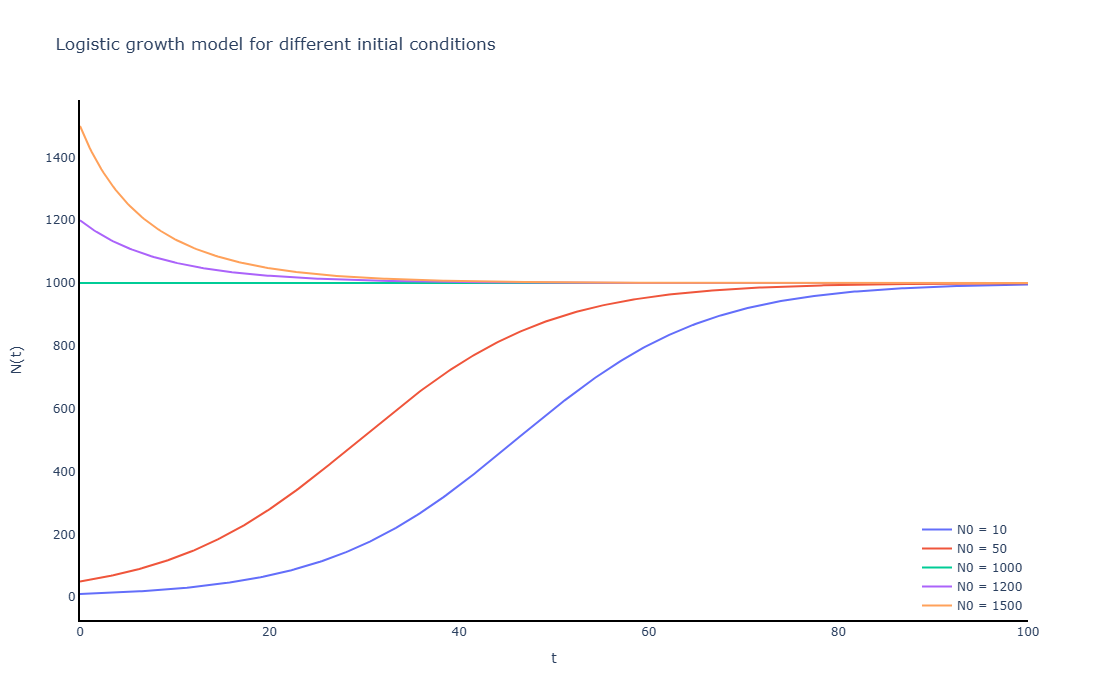

In [31]:
K = 1000
r = 0.1   
t = np.linspace(0, 100, 400)  

def logistic_growth(t, N0, K, r):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

initial_conditions = [10, 50, 1000, 1200, 1500]

fig = go.Figure()

for N0 in initial_conditions:
    N = logistic_growth(t, N0, K, r)
    fig.add_trace(go.Scatter(x=t, y=N, mode='lines', name=f'N0 = {N0}'))

fig.update_layout(
    title='Logistic growth model for different initial conditions',
    xaxis_title='t',
    yaxis_title='N(t)',
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2), 
    yaxis=dict(showgrid=False, linecolor='black', linewidth=2),  
    plot_bgcolor='white',  
    width=700,  
    height=700,
    legend=dict(
        x=1,  
        y=0,  
        xanchor='right',  
        yanchor='bottom'  
    )
)

iplot(fig)

## Numerical solution

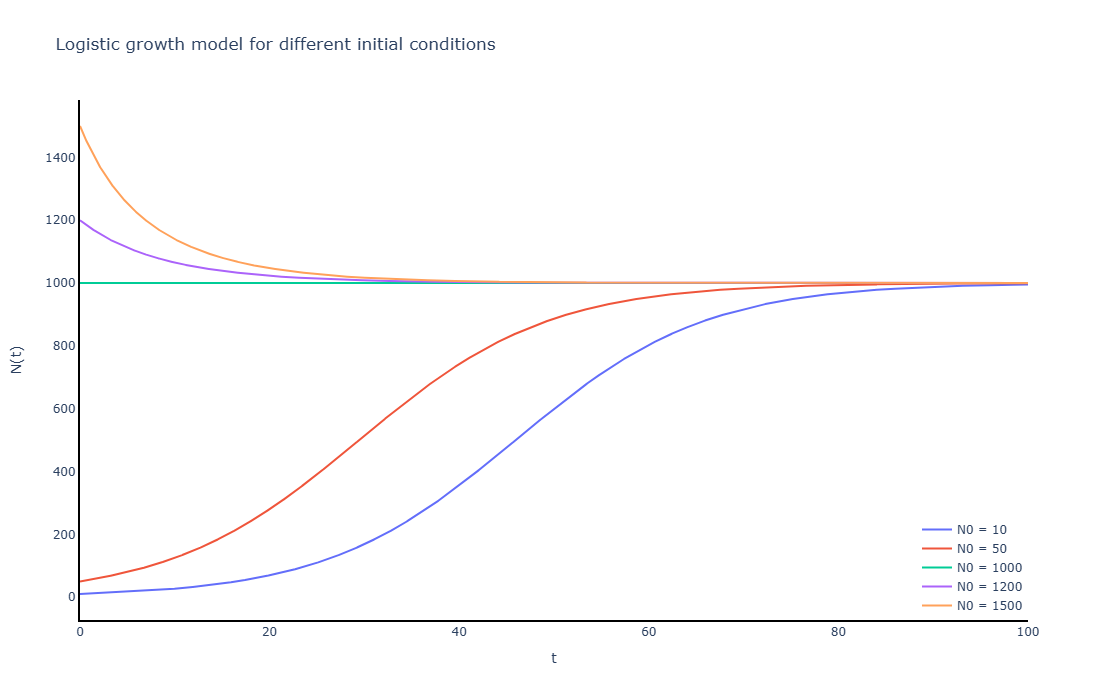

In [32]:
# define equation
def equation(t, N, K, r):
    return r*N*(1 - N/K)

K = 1000
r = 0.1  

t_span = (0, 100)  
initial_conditions = [10, 50, 1000, 1200, 1500]

fig = go.Figure()

for N0 in initial_conditions:
    sol = solve_ivp(equation, t_span, [N0], args=(K, r), max_step=0.01)
    t = sol.t
    N = sol.y.squeeze()
    fig.add_trace(go.Scatter(x=t, y=N, mode='lines', name=f'N0 = {N0}'))

fig.update_layout(
    title='Logistic growth model for different initial conditions',
    xaxis_title='t',
    yaxis_title='N(t)',
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2), 
    yaxis=dict(showgrid=False, linecolor='black', linewidth=2),  
    plot_bgcolor='white',  
    width=700,  
    height=700,
    legend=dict(
        x=1,  
        y=0,  
        xanchor='right',  
        yanchor='bottom'  
    )
)

iplot(fig)

## Fixed points

To find the fixed points of the logistic equation, set the rate of change equal to zero and solve for $N$:

$$
\frac{dN}{dt} = 0 \Rightarrow rN\left(1 - \frac{N}{K}\right) = 0
$$

This equation can be satisfied under two conditions:

1. $N = 0$:
   - This is a trivial solution where the population size is zero. It is a fixed point because if there are no individuals to reproduce, the population remains at zero.

2. $N = K$:
   - This indicates that the population reaches a steady state equal to the carrying capacity $K$. At this point, the growth stops as the population has reached the maximum size that the environment can sustain.

## Linear stability analysis

Assume the one dimensional differential equation

$$
\dot{x} = f(x)
$$

Let $x^*$ be a fixed point, and let $I(t) = x(t) - x^*$ be a small perturbation away from $x^*$. To see whether the perturbation grows or decays, we derive a differential equation for $I$. Differentiation yields

$$
\frac{dI}{dt} = \frac{d}{dt}(x - x^*) = \dot{x}
$$

since $x^*$ is constant. Thus

$$
\dot{I} = \dot{x} = f(I + x^*)
$$

Now using Taylor’s expansion we obtain

$$
f(I + x^*) \approx f(x^*) + I f'(x^*) + O(I^2)
$$

where $O(I^2)$ denotes quadratically small terms in $I$. Finally, note that $f(x^*) = 0$ since $x^*$ is a fixed point. Hence

$$
\dot{I} = f(x^* + I) \approx f'(x^*)I + O(I^2)
$$

Now if $f'(x^*) \neq 0$, the $O(I^2)$ terms are negligible and we may write the approximation

$$
\dot{I} \approx f'(x^*)I
$$

Where the solution of this equation is

$$
I(t) = I_0 e^{f'(x^*)t}
$$

This is a linear equation in $I$, and is called the linearization about $x^*$. It shows that the perturbation $I(t)$ grows exponentially
if $f'(x^*) > 0$ and decays if $f'(x^*) < 0$.

## Exercise: Classify the Fixed Points of the Logistic Equation

### Solution

Here $f(N) = rN\left(1 - \frac{N}{K}\right)$, with fixed points $N^* = 0$ and $N^* = K$. Then

$$
\frac{\partial f}{\partial N} = r-\frac{2rN}{K}
$$

and so $f'(0) = r$ and $f'(K) = -r$. Hence $N^* = 0$ is unstable and $N^* = K$ is stable.

## Fit Logistic growth model to data

### Define the logistic model

In [33]:
def logistic_model(t, K, P0, r):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * (t - t[0])))

### load data

In [34]:
df = pd.read_excel('C:/Users/USER/OneDrive/Desktop/ביולוגיה מתמטית ומערכתית/שבוע 1/Population_data.xlsx')

print(df.head(10))

t = df["Date (years)"]
p = df["Population (millions)"]

   Date (years)  Population (millions)
0          1790                  3.929
1          1800                  5.308
2          1810                  7.240
3          1820                  9.638
4          1830                 12.866
5          1840                 17.069
6          1850                 23.192
7          1860                 31.443
8          1870                 38.558
9          1880                 50.156


In [35]:
initial_guess = [300, 4, 0.03]

params, _ = curve_fit(logistic_model, t, p, p0=initial_guess)

# Extract fitted parameters
K_fitted, P0_fitted, r_fitted = params

t_fit = np.linspace(min(t), max(t), 200)

# Generate fitted curve using the optimized parameters
p_fit = logistic_model(t_fit, K_fitted, P0_fitted, r_fitted)

### Plot results

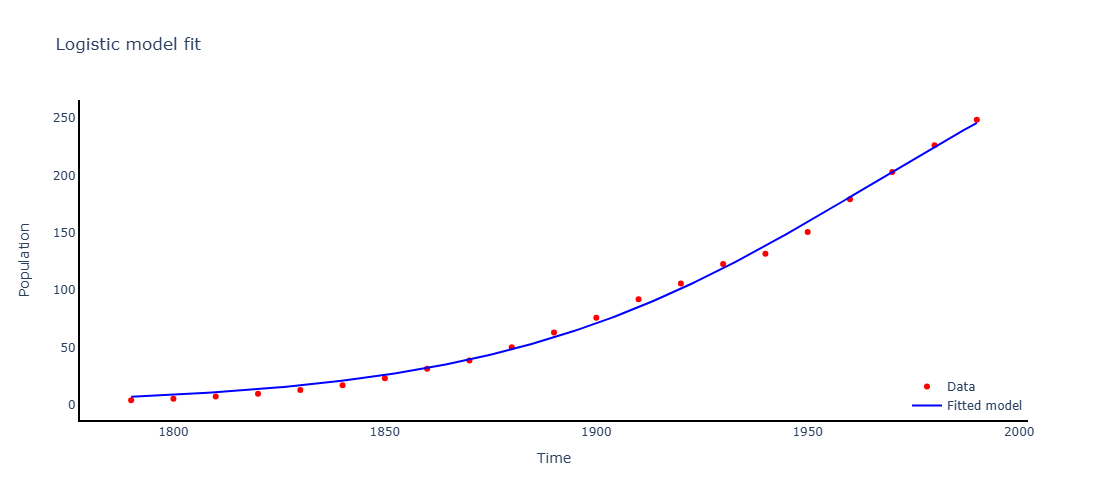

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=t, y=p, mode='markers', name='Data', marker=dict(color='red')))
fig.add_trace(go.Scatter(x=t_fit, y=p_fit, mode='lines', name='Fitted model', line=dict(color='blue')))

fig.update_layout(
    title='Logistic model fit',
    xaxis_title='Time',
    yaxis_title='Population',
    xaxis = dict(showgrid=False, linecolor='black', linewidth=2),
    yaxis = dict(showgrid=False, linecolor='black', linewidth=2),
    plot_bgcolor='white',  
    width=1000,  
    height=500,
    legend=dict(
        x=1,  
        y=0,  
        xanchor='right',  
        yanchor='bottom'  
    )
)

iplot(fig)

### Show fitted parameters

In [37]:
data = {
    'Value': [K_fitted, P0_fitted, r_fitted],   
}

df = pd.DataFrame(data, index=['Fitted K', 'Fitted P0', 'Fitted r'])

df = df.round(3)

print(df)

             Value
Fitted K   387.938
Fitted P0    7.007
Fitted r     0.023


### Estimate r using semilogy plot

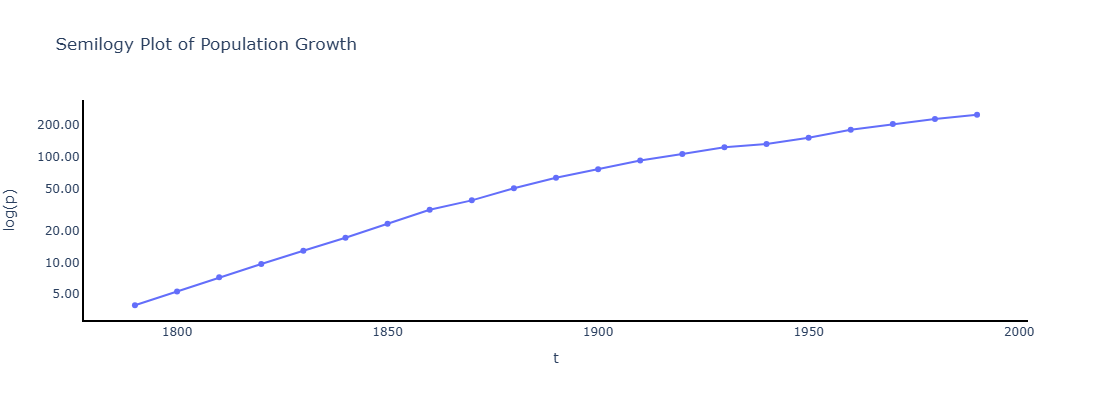

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=t, y=p, mode='lines+markers', name='Log of Population'))

fig.update_layout(
    title='Semilogy Plot of Population Growth',
    xaxis_title='t',
    yaxis_title='log(p)',
    yaxis_type='log',  
    plot_bgcolor='white', 
    xaxis=dict(showgrid=False, linecolor='black', linewidth=2), 
    yaxis=dict(showgrid=False, linecolor='black', linewidth=2),
    width=800,  
    height=400,
    legend=dict(
        x=1,  
        y=0,  
        xanchor='right',  
        yanchor='bottom'  
    )
)

fig.update_yaxes(tickformat=',.2f')

iplot(fig)

### Estimate growth rate

In [39]:
start, end = 0, 6
deg = 1
slope, intercept = np.polyfit(t[start:end], np.log(p)[start:end], deg)

print(f"Estimated growth rate, r: {slope:.3f}")

Estimated growth rate, r: 0.029
